## Import and Read Dataset from Kaggle 

In [1]:
# Download dataset from Kaggle using Kaggle API command
!pip install kaggle

import kaggle
!kaggle datasets download -d vijayuv/onlineretail  

onlineretail.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Open the downloaded zip file in READ mode and extract the file
from zipfile import ZipFile
file_name = 'onlineretail.zip'
with ZipFile(file_name, 'r') as zip:
  zip.printdir()
  zip.extractall()
  print('Done!')

File Name                                             Modified             Size
OnlineRetail.csv                               2019-09-21 10:56:20     45580638
Done!


In [3]:
# Read csv file into DataFrame
import pandas as pd
df = pd.read_csv('onlineretail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Cleansing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Identify and Handle Null Values

In [6]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [8]:
null_customerid_description = df[df['Description'].isnull() & df['CustomerID'].isnull()]
null_customerid_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [9]:
# Remove the 1454 rows containing null description and customer id
df.dropna(subset=['Description', 'CustomerID'], how='all',  inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     133626
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [11]:
# Replace null customer id with "Guest"
df['CustomerID'].fillna('Guest', inplace=True)

In [12]:
df[df['CustomerID']=='Guest']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,Guest,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,Guest,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,Guest,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,Guest,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,Guest,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,Guest,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,Guest,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,Guest,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,Guest,United Kingdom


### Remove Duplicated Rows

In [13]:
# Check for duplicated rows
df.duplicated().sum()

5268

In [14]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [15]:
# Drop the duplicated rows
df.drop_duplicates(inplace=True)

### Remove Rows where Quantity or UnitPrice is Negative

In [16]:
index_names = df[ (df['Quantity'] < 0) | (df['UnitPrice'] < 0) ].index
df.drop(index_names , inplace=True)

### Examine Rows with Unusually Large Quantity or UnitPrice

In [17]:
df[df['Quantity']==df['Quantity'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [18]:
df[df['UnitPrice']==df['UnitPrice'].max()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,Guest,United Kingdom


In [19]:
df[df['Quantity']>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [20]:
df[df['UnitPrice']>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,Guest,United Kingdom
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,Guest,United Kingdom


### Remove Outliers

In [21]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew 

460.1037416511185

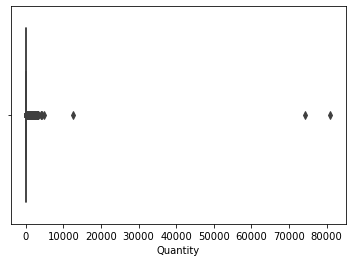

In [22]:
# Check the distribution of data using boxplot
sns.boxplot(x=df["Quantity"])
skew(df['Quantity'])

In [23]:
# Data is highly skewed. Remove outliers: Only retain Quantity below (mean + 1.5*stddev)
df_clean = pd.DataFrame()
df_clean = df.query('Quantity > 0 and Quantity <= 10.68106 + 1.5*157.39957')
print(df_clean.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55    17850.0  United Kingdom  
1  12/1/2010 8:26       3.39    17850.0  United Kingdom  
2  12/1/2010 8:26       2.75    17850.0  United Kingdom  
3  12/1/2010 8:26       3.39    17850.0  United Kingdom  
4  12/1/2010 8:26       3.39    17850.0  United Kingdom  


<AxesSubplot:xlabel='Quantity'>

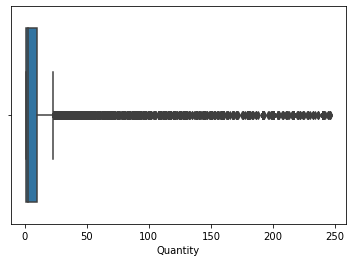

In [24]:
# Check the distribution again
sns.boxplot(x=df_clean["Quantity"])

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

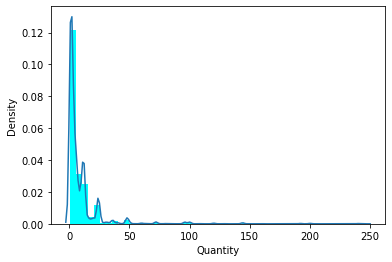

In [25]:
plt.hist(df_clean['Quantity'], 50, density=True, color='cyan')
sns.kdeplot(df_clean['Quantity'])

In [26]:
skew(df['UnitPrice'])

205.1945855838889

In [27]:
# Data is highly skewed. Remove outlier: Only retain UnitPrice below (mean + 1.5*stddev)
df_clean = df_clean.query('UnitPrice > 0 and UnitPrice <= 3.924812 + 1.5*36.119180')

# Check the dataset again
df_clean.describe()

,Quantity,UnitPrice
count,522583.000000,522583.000000
mean,9.026451,3.285275
std,17.968392,3.616001
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,10.000000,4.130000
max,246.000000,57.950000


From here I see that the highest unit price is just 57.95. Did I remove higher unit price unnecessarily?

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

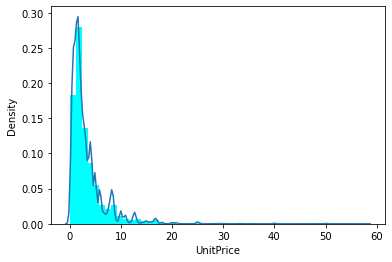

In [28]:
plt.hist(df_clean['UnitPrice'], 50, density=True, color='cyan')
sns.kdeplot(df_clean['UnitPrice'])

### Split Invoice Date to Date, Hour, Day, Month and Year

In [29]:
df_clean['Invoice_Date'] = pd.to_datetime(df_clean['InvoiceDate'], format='%m/%d/%Y %H:%M').dt.date
df_clean['Hour'] = pd.to_datetime(df_clean['InvoiceDate'], format='%m/%d/%Y %H:%M').dt.hour
df_clean['DayofWeek'] = pd.to_datetime(df_clean['InvoiceDate'], format='%m/%d/%Y %H:%M').dt.day_name()

def insert_time(row):
    return row['Invoice_Date'].replace(day=1)

df_clean['MonthFirstDay'] = df_clean.apply(lambda r: insert_time(r), axis=1)
df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Hour,DayofWeek,MonthFirstDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01


## Data Enrichment

In [30]:
# Add a column: TotalPrice
df_clean['TotalPrice'] = df_clean['Quantity']*df_clean['UnitPrice']
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Hour,DayofWeek,MonthFirstDay,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,20.34


## Timeseries Trend

### Monthly Total Order

In [31]:
df_monthly_order = df_clean.groupby(df_clean['MonthFirstDay']).InvoiceNo.nunique().reset_index()

In [32]:
df_monthly_order

,MonthFirstDay,InvoiceNo
0,2010-12-01,1540
1,2011-01-01,1072
2,2011-02-01,1083
3,2011-03-01,1432
4,2011-04-01,1222
5,2011-05-01,1650
6,2011-06-01,1509
7,2011-07-01,1448
8,2011-08-01,1338
9,2011-09-01,1814


Text(0.5, 1.0, 'Monthly Total Order')

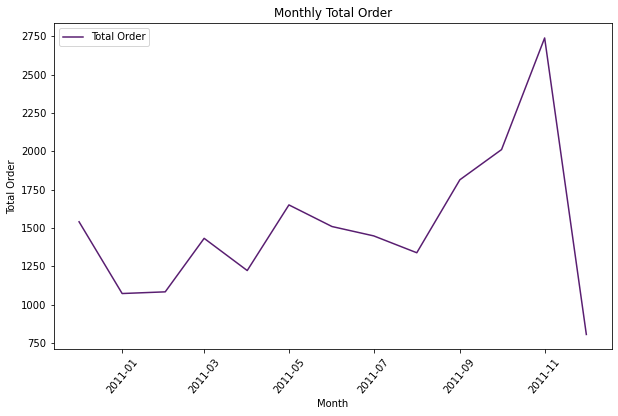

In [33]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes("dark")
sns.lineplot(x="MonthFirstDay", y="InvoiceNo", data=df_monthly_order,
            label="Total Order", color="m")

plt.xlabel('Month')
plt.ylabel('Total Order')
plt.xticks(rotation=50)
plt.title('Monthly Total Order')

### Hour and Day of Week Trends

In [34]:
df_heatmap = df_clean.groupby(['Hour','DayofWeek']).InvoiceNo.nunique()
df_heatmap

Hour  DayofWeek
6     Thursday       1
7     Friday         5
      Monday         4
      Thursday       8
      Tuesday        5
                  ... 
19    Thursday     133
      Wednesday      2
20    Friday         1
      Thursday      16
      Wednesday      1
Name: InvoiceNo, Length: 74, dtype: int64

In [35]:
df_heatmap = df_heatmap.unstack(level=0)
df_heatmap

Hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
DayofWeek,,,,,,,,,,,,,,,
Friday,NaN,5.0,121.0,276.0,451.0,391.0,470.0,422.0,399.0,290.0,154.0,91.0,2.0,9.0,1.0
Monday,NaN,4.0,88.0,273.0,351.0,345.0,485.0,445.0,388.0,359.0,235.0,92.0,2.0,NaN,NaN
Sunday,NaN,NaN,NaN,2.0,223.0,390.0,459.0,359.0,310.0,340.0,114.0,NaN,NaN,NaN,NaN
Thursday,1.0,8.0,122.0,303.0,453.0,385.0,587.0,494.0,466.0,446.0,350.0,257.0,174.0,133.0,16.0
Tuesday,NaN,5.0,114.0,306.0,407.0,421.0,548.0,489.0,413.0,450.0,210.0,113.0,9.0,NaN,NaN
Wednesday,NaN,5.0,116.0,300.0,437.0,422.0,616.0,502.0,447.0,424.0,262.0,104.0,NaN,2.0,1.0


Text(0.5, 1.0, 'Heatmap of Orders')

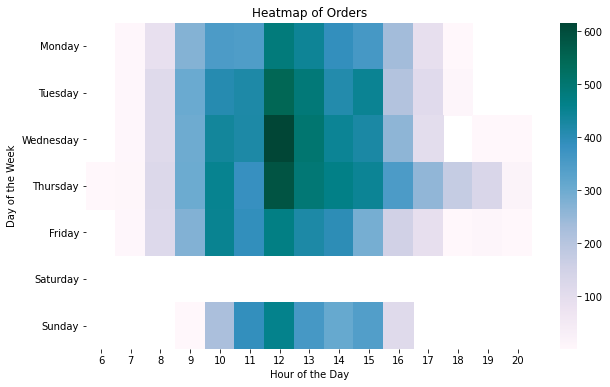

In [36]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes("dark")
reorderlist = [ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']
sns.heatmap(df_heatmap.reindex(reorderlist), cmap="PuBuGn")

plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.title('Heatmap of Orders')

There were no sales on Saturdays

## Customer Trends

### Monthly Total Order by Country

In [37]:
df_monthly_order_country = df_clean.groupby(['MonthFirstDay','Country']).InvoiceNo.nunique().reset_index()
df_monthly_order_country.head()

,MonthFirstDay,Country,InvoiceNo
0,2010-12-01,Australia,3
1,2010-12-01,Austria,1
2,2010-12-01,Bahrain,1
3,2010-12-01,Belgium,5
4,2010-12-01,Channel Islands,1


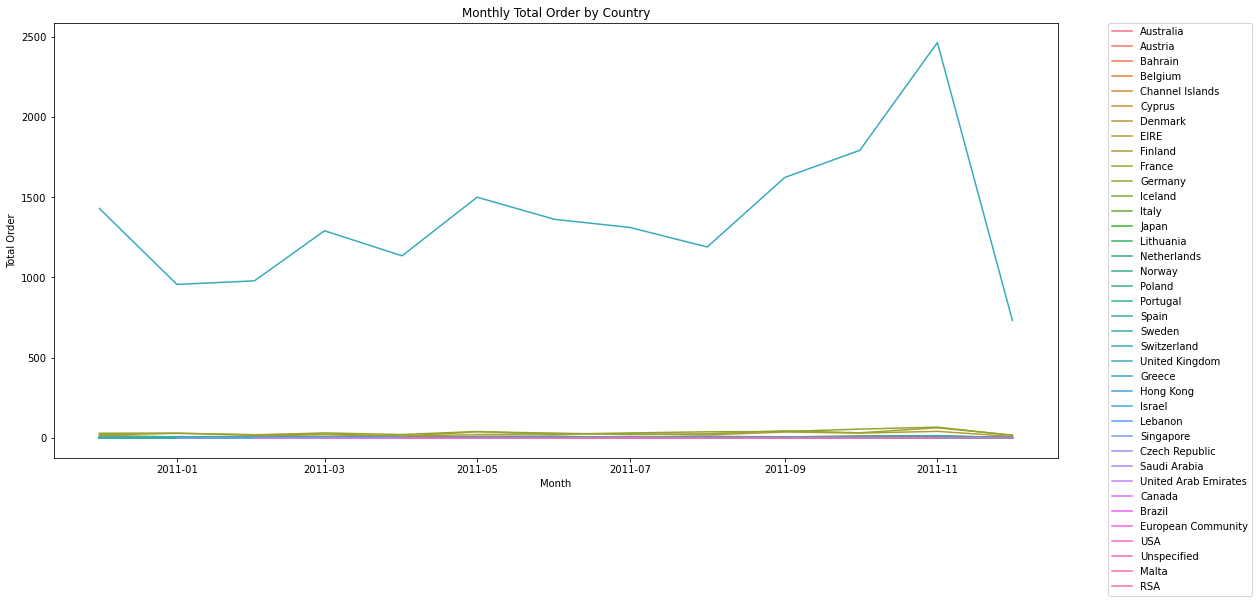

In [38]:
f, ax = plt.subplots(figsize=(18, 8))
sns.set_color_codes('pastel')
sns.lineplot(x='MonthFirstDay', y='InvoiceNo', hue='Country', 
             data=df_monthly_order_country)

plt.xlabel('Month')
plt.ylabel('Total Order')
plt.title('Monthly Total Order by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Top 10 Countries with Highest Orders

In [39]:
df_country = df_monthly_order_country.groupby(['Country']).InvoiceNo.sum().reset_index()\
             .sort_values('InvoiceNo', ascending = False).reset_index(drop=True).head(10) 
df_country

,Country,InvoiceNo
0,United Kingdom,17766
1,Germany,452
2,France,386
3,EIRE,284
4,Belgium,98
5,Spain,90
6,Netherlands,90
7,Australia,55
8,Switzerland,54
9,Portugal,52


Text(0.5, 1.0, 'Top 10 Countries with Highest Orders')

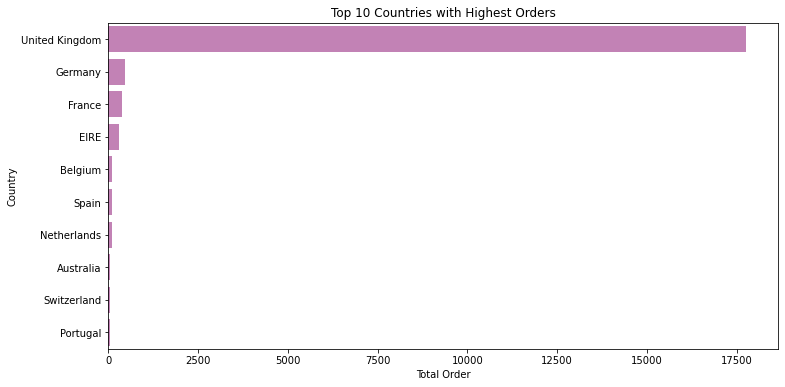

In [40]:
f, ax = plt.subplots(figsize=(12, 6))
sns.set_color_codes("colorblind")
sns.barplot(x="InvoiceNo", y="Country", data=df_country,
            label="Total Order", color="m")

plt.xlabel('Total Order')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Orders')

### UK Top Customers with Highest Purchase

In [41]:
!pip install squarify
import squarify

In [42]:
df_customer = df_clean.query('Country == "United Kingdom"').groupby(['CustomerID']).InvoiceNo.count().reset_index()\
              .sort_values('InvoiceNo', ascending = False).reset_index(drop=True).head(50) 
df_customer.head()

,CustomerID,InvoiceNo
0,Guest,130031
1,17841.0,7675
2,14096.0,5098
3,12748.0,4407
4,14606.0,2676


Text(0.5, 1.0, 'Top 50 Customers in UK')

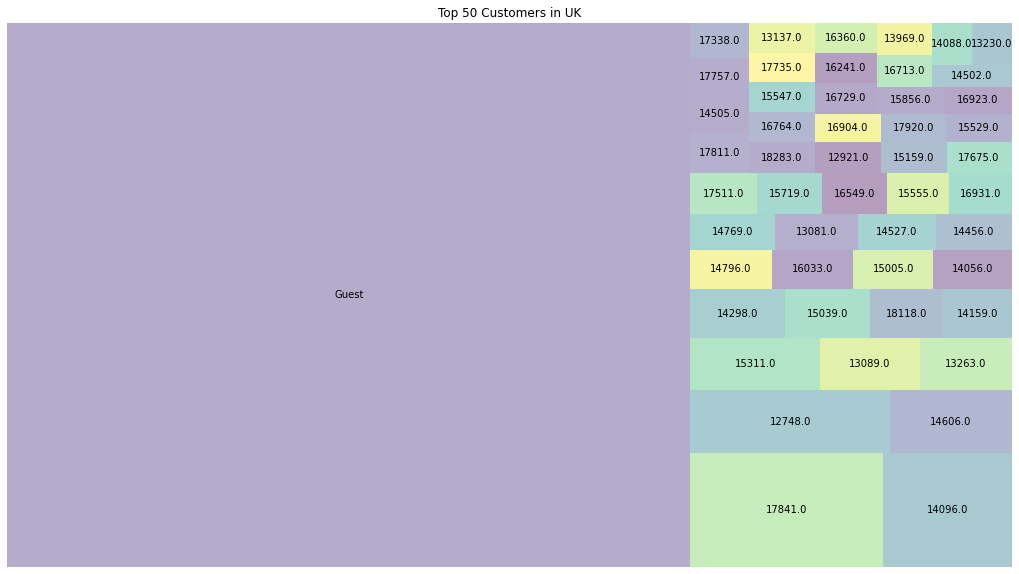

In [43]:
sizes = df_customer['InvoiceNo']
labels = df_customer['CustomerID']

fig, ax = plt.subplots(figsize = (18,10))
squarify.plot(sizes, label = labels, alpha=.4)
plt.axis('off')
plt.title('Top 50 Customers in UK')

## Item Trends

In [44]:
df_item = df_clean.groupby(['StockCode','Description']).InvoiceNo.count().sort_values(ascending = False).reset_index()
df_item

,StockCode,Description,InvoiceNo
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2230
1,85099B,JUMBO BAG RED RETROSPOT,2089
2,22423,REGENCY CAKESTAND 3 TIER,2006
3,47566,PARTY BUNTING,1699
4,20725,LUNCH BAG RED RETROSPOT,1581
...,...,...,...
4144,90135A,ORANGE/FUSCHIA STONES NECKLACE,1
4145,79323B,BLACK CHERRY LIGHTS,1
4146,77079,DOLPHIN WINDMILL,1
4147,21009,ETCHED GLASS STAR TREE DECORATION,1


Text(0.5, 1.0, 'Distribution of Total Items Sold')

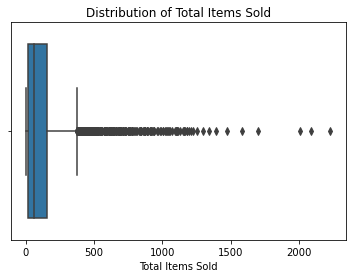

In [45]:
sns.boxplot(x=df_item['InvoiceNo'])
plt.xlabel('Total Items Sold')
plt.title('Distribution of Total Items Sold')

In [46]:
# For pareto chart, long tail items merged as "Others"
df_item.describe()

,InvoiceNo
count,4149.000000
mean,125.953965
std,188.772651
min,1.000000
25%,13.000000
50%,58.000000
75%,158.000000
max,2230.000000


In [47]:
df_item['Description_Normalized'] = np.where(df_item['InvoiceNo'] < 10,'Others',df_item['Description'])
df_item

,StockCode,Description,InvoiceNo,Description_Normalized
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2230,WHITE HANGING HEART T-LIGHT HOLDER
1,85099B,JUMBO BAG RED RETROSPOT,2089,JUMBO BAG RED RETROSPOT
2,22423,REGENCY CAKESTAND 3 TIER,2006,REGENCY CAKESTAND 3 TIER
3,47566,PARTY BUNTING,1699,PARTY BUNTING
4,20725,LUNCH BAG RED RETROSPOT,1581,LUNCH BAG RED RETROSPOT
...,...,...,...,...
4144,90135A,ORANGE/FUSCHIA STONES NECKLACE,1,Others
4145,79323B,BLACK CHERRY LIGHTS,1,Others
4146,77079,DOLPHIN WINDMILL,1,Others
4147,21009,ETCHED GLASS STAR TREE DECORATION,1,Others


In [48]:
df_item_normalized = df_item.groupby(['Description_Normalized']).InvoiceNo.sum().reset_index()
df_item_normalized = df_item_normalized.sort_values(by='InvoiceNo',ascending=False).reset_index(drop=True)
df_item_normalized

,Description_Normalized,InvoiceNo
0,Others,3478
1,WHITE HANGING HEART T-LIGHT HOLDER,2297
2,JUMBO BAG RED RETROSPOT,2089
3,REGENCY CAKESTAND 3 TIER,2006
4,PARTY BUNTING,1699
...,...,...
3204,LA PALMIERA WALL THERMOMETER,10
3205,JARDIN ETCHED GLASS SMALL BELL JAR,10
3206,AMBER BERTIE GLASS BEAD BAG CHARM,10
3207,JADE GREEN ENAMEL HAIR COMB,10


In [49]:
df_item_normalized["Cum_Percentage"] = df_item_normalized["InvoiceNo"].cumsum()/df_item_normalized["InvoiceNo"].sum()*100
df_item_normalized

,Description_Normalized,InvoiceNo,Cum_Percentage
0,Others,3478,0.665540
1,WHITE HANGING HEART T-LIGHT HOLDER,2297,1.105088
2,JUMBO BAG RED RETROSPOT,2089,1.504833
3,REGENCY CAKESTAND 3 TIER,2006,1.888695
4,PARTY BUNTING,1699,2.213811
...,...,...,...
3204,LA PALMIERA WALL THERMOMETER,10,99.992346
3205,JARDIN ETCHED GLASS SMALL BELL JAR,10,99.994259
3206,AMBER BERTIE GLASS BEAD BAG CHARM,10,99.996173
3207,JADE GREEN ENAMEL HAIR COMB,10,99.998086


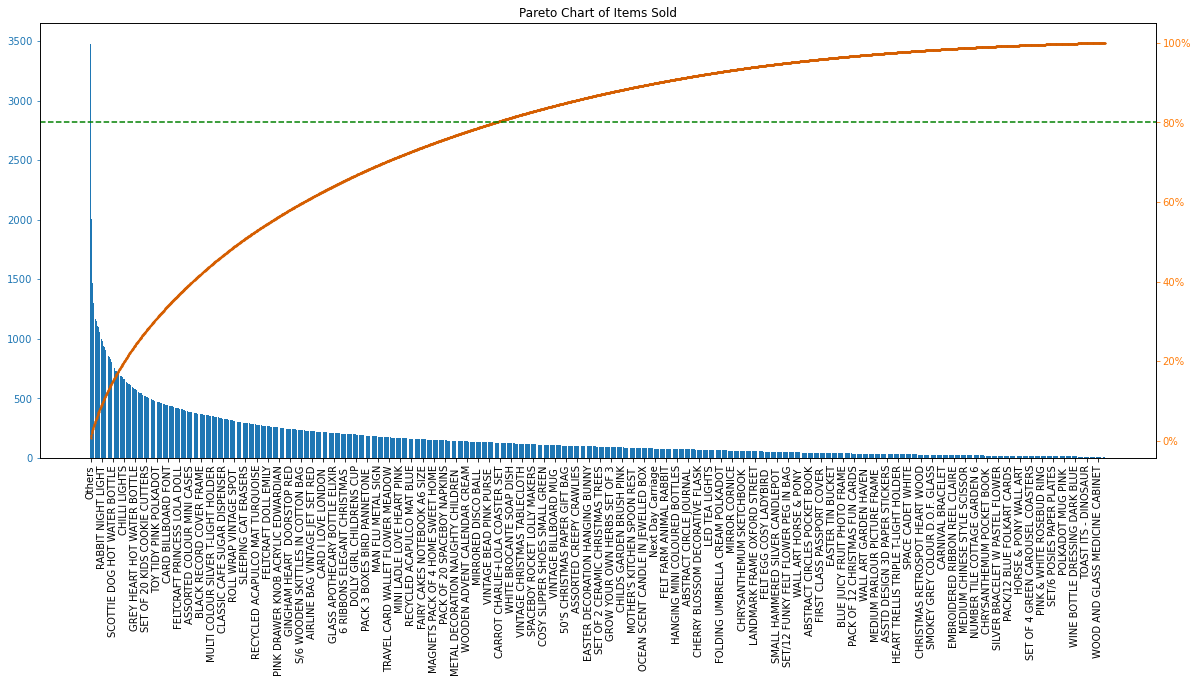

In [50]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(df_item_normalized.Description_Normalized, df_item_normalized["InvoiceNo"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_item_normalized.Description_Normalized, df_item_normalized["Cum_Percentage"], linewidth=0.5, color="r", marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color="green", linestyle="dashed")
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_xticks(df_item_normalized.Description_Normalized[::35])
ax.set_xticklabels(df_item_normalized.Description_Normalized[::35], rotation=90)
plt.title('Pareto Chart of Items Sold')
plt.show()

## Save DataFrame as CSV File for Future Use

In [51]:
 df_clean.to_csv(r'C:\Users\user\Desktop\Shihui\projects\OnlineRetail_Clean.csv', index = False)